Name : Sanjeev Kumar Khatri

Roll no : 23

Group : CS

Assignment : 04

Githublink : https://github.com/darkamgel/machinelearning-LAB

Practical Assignment - 4

1. Topic Modeling 
2. Latent Dirichlet allocation Comparing documents by 
3. topics Choosing the number of topics



Things included in this assignemnt:
* What topic models are and, in particular, about `latent Dirichlet allocation (LDA)`
* How to use the gensim package to build topic models
* How topic models can be useful as an intermediate representation for different applications
* How we can build a topic model of the whole of the English-language Wikipedia


there are two models in ML with the initials LDA : `latent Dirichelt allocation` which is a topic modeling method and `linear discriminant analysis ` which is a classification method.

The scikit-learn tool has a submodule , `sklearn.lda` which implements `linear discriminant analysis`. but unfortunately `latent Dirichlet allocation` cant be implemented using scikit-learn

In [ ]:
import gensim
from gensim import corpora, models, matutils

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import path

if not path.exists('./data/ap/ap.dat'):
    print('Error: Expected data to be present at data/ap/')
    print('Please cd into ./data & run ./download_ap.sh')

In [ ]:
NUM_TOPICS = 100

In [ ]:
corpus = corpora.BleiCorpus('./data/ap/ap.dat', './data/ap/vocab.txt')

We can now build a topic LDA model

In [ ]:
model = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=None)

The result will almost surely look different on different computer! The learning algorithm uses some random numbers, and every time we learn a new topic model on the same input data, the result is different

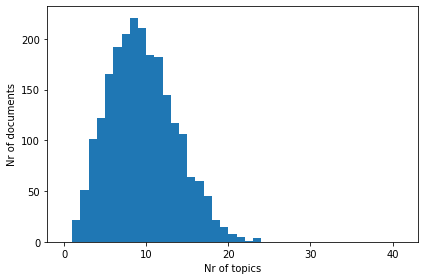

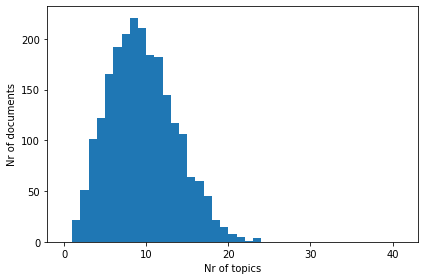

In [ ]:
num_topics_used = [len(model[doc]) for doc in corpus]
fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()
fig.savefig('Figure_04_01.png')
fig

we can change the alpha value . here alpha needs to be a value greater than zero, but is typically set to a lesser value , usually the alpha parameter bigger values will result in more topics per document.

`default value of alpha = 1/num_topics`

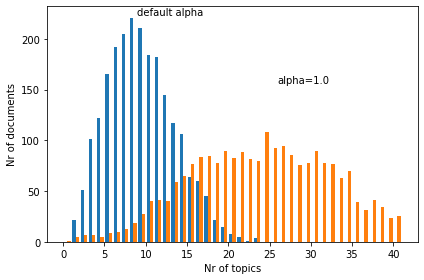

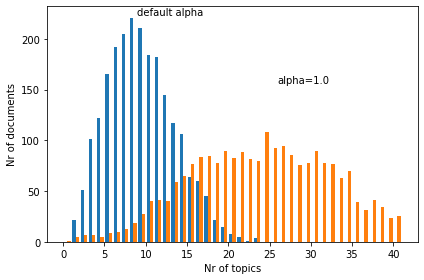

In [ ]:
ALPHA = 1.0

model1 = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=ALPHA)
num_topics_used1 = [len(model1[doc]) for doc in corpus]

fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')

ax.text(9, 223, r'default alpha')
ax.text(26, 156, 'alpha=1.0')
fig.tight_layout()
fig.savefig('Figure_04_02.png')
fig

In [ ]:
doc = corpus.docbyoffset(0)
topics = model[doc]
print(topics)

[(6, 0.031135747), (9, 0.014744701), (30, 0.11023034), (35, 0.033755615), (44, 0.027238932), (45, 0.24051005), (47, 0.043841545), (50, 0.03740267), (51, 0.032178417), (55, 0.3472365), (61, 0.017074032), (83, 0.030974114)]


In [ ]:
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1)
max_topic = weight.argmax()

In [ ]:
words = model.show_topic(max_topic, 64)

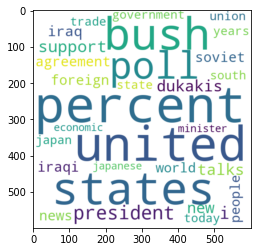

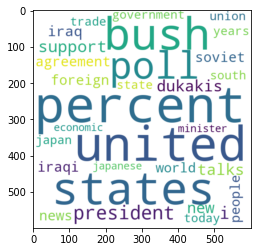

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', max_words=30, width=600, height=600)
wc = wc.generate_from_frequencies(dict(words))


fig,ax = plt.subplots()

ax.imshow(wc, interpolation="bilinear")
fig

## News Data ##

In [ ]:
import nltk.stem

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sauga_g\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
english_stemmer = nltk.stem.SnowballStemmer('english')
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords.update(['from:', 'subject:', 'writes:', 'writes'])

In [ ]:
class DirectText(corpora.textcorpus.TextCorpus):

    def get_texts(self):
        return self.input

    def __len__(self):
        return len(self.input)

In [ ]:
import sklearn.datasets
dataset = sklearn.datasets.load_mlcomp("20news-18828", "train",
                                       mlcomp_root='./data')

AttributeError: module 'sklearn.datasets' has no attribute 'load_mlcomp'

In [ ]:
import gensim
if not path.exists('wiki_lda.pkl'):
    import sys
    sys.stderr.write('''\
This script must be run after wikitopics_create.py!

That script creates and saves the LDA model (this must onlly be done once).
This script is responsible for the analysis.''')
    
# Load the preprocessed Wikipedia corpus (id2word and mm)
id2word = gensim.corpora.Dictionary.load_from_text(
    'data/wiki_en_output_wordids.txt.bz2')
mm = gensim.corpora.MmCorpus('data/wiki_en_output_tfidf.mm')

# Load the precomputed model
model = gensim.models.ldamodel.LdaModel.load('wiki_lda.pkl')

topics = np.load('topics.npy', mmap_mode='r')

In [ ]:
lens = (topics > 0).sum(axis=1)
print('Mean number of topics mentioned: {0:.3}'.format(np.mean(lens)))
print('Percentage of articles mentioning less than 10 topics: {0:.1%}'.format(np.mean(lens <= 10)))

weights = topics.sum(0)

Mean number of topics mentioned: 3.41
Percentage of articles mentioning less than 10 topics: 100.0%


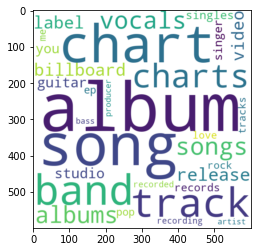

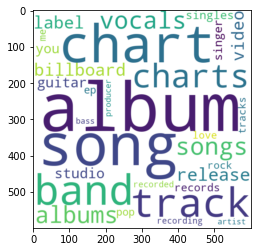

In [ ]:
words = model.show_topic(weights.argmax(), 64)

wc = WordCloud(background_color='white', max_words=30, width=600, height=600)
wc = wc.generate_from_frequencies(dict(words))

fig,ax = plt.subplots()

ax.imshow(wc, interpolation="bilinear")
fig

In [ ]:
fraction_mention = np.mean(topics[:,weights.argmax()] > 0)
print("The most mentioned topics is mentioned in {:.1%} of documents.".format(fraction_mention))
total_weight = np.mean(topics[:,weights.argmax()])
print("It represents {:.1%} of the total number of words.".format(total_weight))

The most mentioned topics is mentioned in 8.9% of documents.
It represents 4.5% of the total number of words.


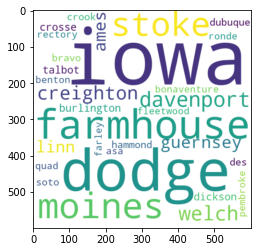

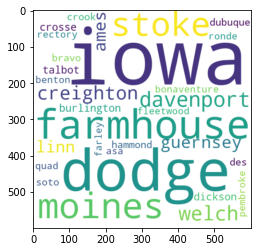

In [ ]:
words = model.show_topic(weights.argmin(), 64)

wc = WordCloud(background_color='white', max_words=30, width=600, height=600)
wc = wc.generate_from_frequencies(dict(words))
fig,ax = plt.subplots()

ax.imshow(wc, interpolation="bilinear")
fig

In [ ]:
fraction_mention = np.mean(topics[:,weights.argmin()] > 0)
print("The least mentioned topics is mentioned in {:.1%} of documents.".format(fraction_mention))
total_weight = np.mean(topics[:,weights.argmin()])
print("It represents {:.1%} of the total number of words.".format(total_weight))

The least mentioned topics is mentioned in 1.2% of documents.
It represents 0.1% of the total number of words.
